In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Collection and Analysis

In [2]:
# loading the diabetes dataset to a pandas DataFrame
# https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/code
diabetes_dataset = pd.read_csv(r"C:\Users\prate\Downloads\test1\data_science\diabetes_prediction_dataset.csv") 

In [6]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# number of rows and Columns in this dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
diabetes_dataset = diabetes_dataset.astype({'age':'int'})

In [9]:
#Changing the object values to int
diabetes_dataset['gender'].replace(['Other', 'Male','Female'],[0,1,2], inplace=True)

In [10]:
diabetes_dataset['smoking_history'].replace(['never', 'No Info', 'current', 'former', 'ever', 'not current'],[0,1,2,3,4,5,], inplace=True)

<Axes: >

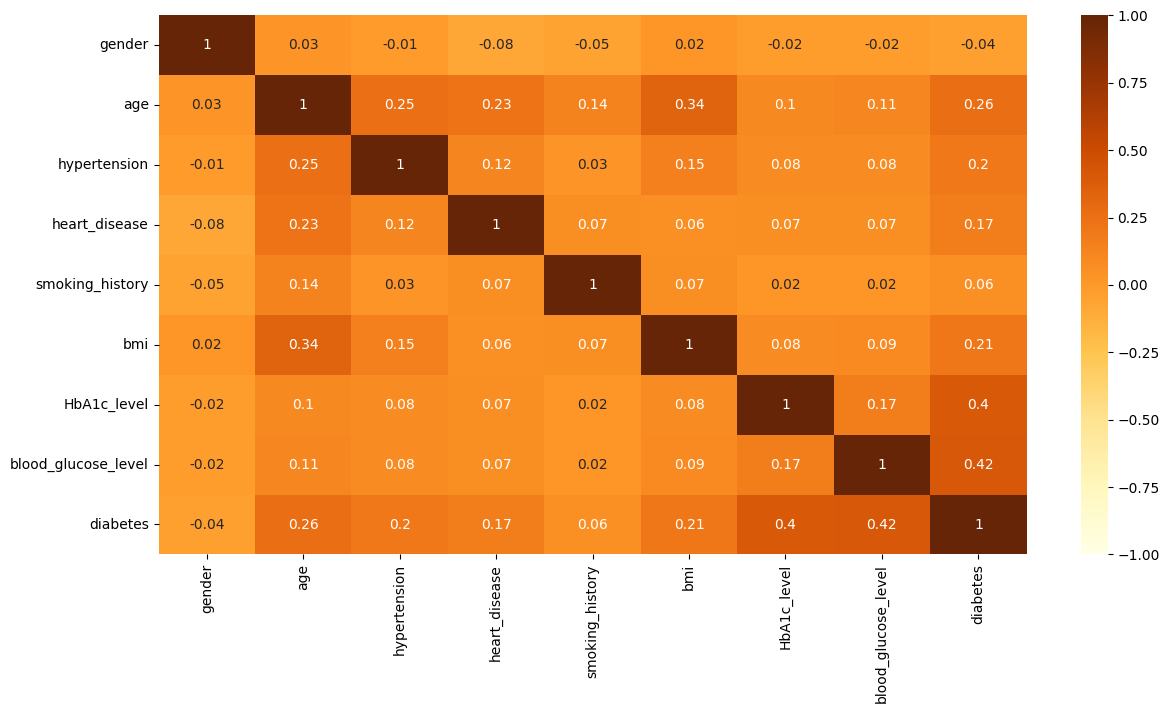

In [11]:
fig, ax = plt.subplots(figsize = (14,7))
corr = diabetes_dataset.corr().round(2)
sns.heatmap(corr, annot = True, ax=ax, vmin=-1, vmax=1, center=0, cmap='YlOrBr')


In [12]:
#Removed Other because the values were very less
diabetes_dataset = diabetes_dataset[diabetes_dataset['gender'] != 0]
diabetes_dataset = diabetes_dataset.reset_index(drop=True)

In [13]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99982 entries, 0 to 99981
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  int64  
 1   age                  99982 non-null  int32  
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  int64  
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 6.5 MB


In [14]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,1.585625,41.877878,0.074863,0.039427,1.306685,27.320757,5.527529,138.057810,0.085015
std,0.492616,22.535787,0.263172,0.194610,1.454212,6.636853,1.070665,40.709469,0.278906
min,1.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,1.000000,24.000000,0.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,60.000000,0.000000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [17]:
diabetes_dataset['diabetes'].value_counts()

diabetes
0    91482
1     8500
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [18]:
diabetes_dataset.groupby('diabetes').mean()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,1.591275,40.106119,0.058995,0.029241,1.280984,26.887067,5.396759,132.851173
1,1.524824,60.946588,0.245647,0.149059,1.583294,31.988382,6.934953,194.094706


Train Test Split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_dataset.drop("diabetes", axis=1), diabetes_dataset["diabetes"], test_size=0.3)

Model training

In [22]:
classifier = xgb.XGBClassifier()

In [23]:
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
print('Training accuracy {:.4f}'.format(classifier.score(X_train,Y_train)))
print('Testing accuracy {:.4f}'.format(classifier.score(X_test,Y_test)))

Training accuracy 0.9761
Testing accuracy 0.9718


Making a Predictive System

In [26]:
#input_data = (1,89,66,23,94,28.1,0.167,21)
input_data=(2,90,62,20,87,27.2,0.345,194.09)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

'''if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')'''

[0]
The person is not diabetic


Saving the trained model

In [28]:
import pickle

In [29]:
filename = 'diabetes_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [30]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.pkl', 'rb'))